<a href="https://colab.research.google.com/github/kalaiselvan-t/Deep-Learning/blob/master/Classifying%20newswires%20(Reuters%20dataset)%20%3A%20Multiclass%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classifying newswires: Multiclass classification

## Loading the dataset

**Description: ** It is a set of short newswires published by Reuters in 1986. It is a simple, widely used toy dataset for text classification. There are 46 different topics. Each topics has at least 10 examples in the dataset

**No of Training Examples:**  8982

**No of Test Examples:** 2246

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)     # num_words - restricts the data to the 10000 most frequently occuring words found in the data

print("Length of training data: ", len(train_data))
print("Length of test data: ", len(test_data))


In [ ]:
# train_data[10]

'''
Decode - Convert index to words
'''

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
decoded_newswires = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

# decoded_newswires
# train_labels[10]

## Preparing the data

In [ ]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i,label in enumerate(labels):
    results[i,label] = 1
  return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# There is a built in way to do this in keras. Here we are not using it
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

## Building the network

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validate your approach

Set apart 1000 samples from the dataset to use as a validation set

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [ ]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 89ms/step - loss: 2.6934 - accuracy: 0.5096 - val_loss: 1.7968 - val_accuracy: 0.6230
Epoch 2/20
16/16 [==============================] - 1s 83ms/step - loss: 1.5195 - accuracy: 0.6800 - val_loss: 1.3710 - val_accuracy: 0.6990
Epoch 3/20
16/16 [==============================] - 1s 66ms/step - loss: 1.1710 - accuracy: 0.7533 - val_loss: 1.1854 - val_accuracy: 0.7390
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.9557 - accuracy: 0.7923 - val_loss: 1.0781 - val_accuracy: 0.7690
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.7903 - accuracy: 0.8255 - val_loss: 0.9932 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 44ms/step - loss: 0.6592 - accuracy: 0.8561 - val_loss: 0.9731 - val_accuracy: 0.7780
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5496 - accuracy: 0.8795 - val_loss: 0.9072 - val_accuracy: 0.8090
Epoch 8/20
16

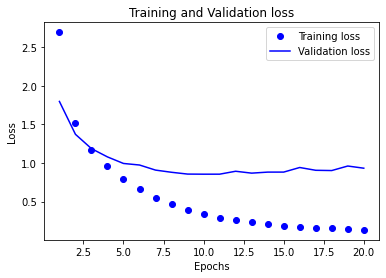

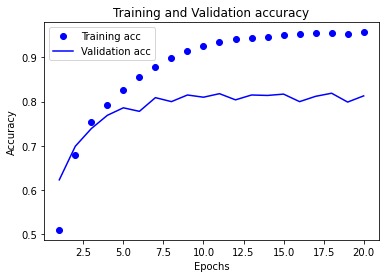

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.title("Training and Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
plt.plot(epochs, acc, 'bo', label="Training acc")
plt.plot(epochs, val_acc, 'b', label="Validation acc")
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Retrain the model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

Epoch 1/9
16/16 [==============================] - 3s 106ms/step - loss: 2.7657 - accuracy: 0.4530 - val_loss: 1.9008 - val_accuracy: 0.6050
Epoch 2/9
16/16 [==============================] - 1s 46ms/step - loss: 1.5925 - accuracy: 0.6708 - val_loss: 1.3923 - val_accuracy: 0.6910
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.1946 - accuracy: 0.7452 - val_loss: 1.1804 - val_accuracy: 0.7400
Epoch 4/9
16/16 [==============================] - 1s 47ms/step - loss: 0.9712 - accuracy: 0.7902 - val_loss: 1.0660 - val_accuracy: 0.7760
Epoch 5/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8054 - accuracy: 0.8285 - val_loss: 0.9983 - val_accuracy: 0.7970
Epoch 6/9
16/16 [==============================] - 1s 45ms/step - loss: 0.6767 - accuracy: 0.8534 - val_loss: 0.9642 - val_accuracy: 0.7900
Epoch 7/9
16/16 [==============================] - 1s 47ms/step - loss: 0.5688 - accuracy: 0.8772 - val_loss: 0.9353 - val_accuracy: 0.7880
Epoch 8/9
16/16 [==

In [ ]:
results

[0.9472484588623047, 0.7853962779045105]

In [ ]:
predictions = model.predict(x_test)

predictions[0].shape
np.sum(predictions[0])
np.argmax(predictions[0])

## Bridge

#### Future Experiments

1. Modify the number of layers
2. Modify the number of hidden units